In [8]:
# Решето Эратосфена
def generate_prime_table(n):
    multiples = set()
    for i in range(2, n+1):
        if i not in multiples:
            yield i
            multiples.update(range(i*i, n+1, i))

# subexponentional funtion
def L(c, g, q): return e^(c*(log(q))^g *(log(log(q)))^(1-g))

def power_of_divisor(n, divisor):
    if (n % divisor != 0):
        return 0

    alpha = 1
    while(n % divisor^(alpha*2) == 0):
        alpha*=2

    min_border = alpha
    max_border = alpha*2

    alpha = int((min_border + max_border)/2)
    while(min_border + 1 != max_border):
        if (n % divisor^alpha == 0):
            min_border = alpha
        else:
            max_border = alpha
        alpha = int((min_border + max_border)/2)
    return alpha

In [9]:
def check_factor(number, primeTable):
    
    # 1. we should try Miller-Rabin test [done]
    # 2. we should try Brenet's algoritm (or its analog like Lenstra alg) [TODO]
    
    def miller_rabin(n):
        with proof.WithProof('arithmetic',False):
            return is_prime(n)
    
    if (miller_rabin(number) and number not in primeTable):
        return False, None
    
    coefficients = []
    
    for p in primeTable:
        max_power = power_of_divisor(Integer(number), Integer(p))
        number /= p^max_power 
        coefficients.append(max_power)        
    
    success = (number == 1)
    return (success, coefficients)
        

def generate_equasion(a, q, primeTable, ring):
    
    equasionGenerated = False
    coefficients = []
    while not equasionGenerated:
        xsi = randint(2, q-1)
        axsi = ring(a)^xsi
        equasionGenerated, coefficients = check_factor(Integer(axsi), primeTable)
        
    return (xsi, coefficients)

In [10]:
def adleman_log(a, b, p): # return log_a (b) (mod q) where q is ord_p (a)
    if (p not in Primes()):
        return None
    
    ring = IntegerModRing(p)
    q = ring(a).multiplicative_order()
    ring_q = IntegerModRing(q)
    # TO DO: when q=p1^k1*...*ps^k2
    #        use Chinese remainder theorem
    if (q not in Primes()):
        return None
    
    # if both q and p are small we can find solution
    # with simple brute force
    if (q < sqrt(p) and p < 2^17):
        ax = ring(1)
        for x in range(1, q):
            ax *= a
            if (ax == b):
                return x
        return None
    
    # it is taken like this because of complexity balance on a lagre sacels
    border = ceil(L(1/2, 1/2, q)) 
    primeTable = set(generate_prime_table(border))
    
    coefficients = []
    equasions = []
    tableSize = len(primeTable)
    counter = 0
    while len(equasions) != tableSize: 
        equasions += [generate_equasion(a,q,primeTable,ring) for _ in range(tableSize)]
        coefficients = list(map(lambda x: x[1], equasions))
        
        # USE Chinese remainder theorem SOMEHOWE when q is not prime
        independentEquasions = Matrix(ring_q, coefficients).transpose().pivots()
               
        equasions = [ equasions[i] for i in independentEquasions]
        coefficients = [ coefficients[i] for i in independentEquasions]
        
    # at this point equasions are generated, so we're solving them
    y = vector(list(map(lambda x: x[0], equasions)))
    
    A = Matrix(ring_q, coefficients)
    x = (A^-1) * y
    
    # finding log_a (b)
    while True:
        xsi = randint(2, q-1)
        bxsi = ring(b)^xsi
        found, decomposition = check_factor(bxsi, primeTable)
        if found:
            b_coeffisients = vector(decomposition)
            return (ring_q(xsi)^-1)*(x.dot_product(b_coeffisients))

In [11]:
adleman_log(14306, 46388, 65521)

5

In [12]:
# 81119 - это простое число софи жермен порядка 2^16
adleman_log(2, 8192, 81119)

13

In [14]:
# 8867180867 - это простое число софи жермен порядка 2^32
adleman_log(3, 5164558382, 8867180867)

42

In [15]:
# 61209301350421962503 - это простое число софи жермен порядка 2^64
# adleman_log(2, 4398046511104, 61209301350421962503)

In [16]:
data = [(8, 8, 270, 587, 156, 293), (9, 9, 285, 839, 345, 419), (10, 10, 949, 4007, 1262, 2003), (11, 11, 4861, 6827, 1666, 3413), (12, 12, 5504, 12227, 4846, 6113), (13, 13, 11333, 23567, 3579, 11783), (14, 14, 32978, 44963, 8224, 22481), (15, 15, 22910, 66959, 12999, 33479), (16, 16, 170820, 223019, 82691, 111509), (17, 17, 323149, 415343, 152572, 207671), (18, 18, 260426, 578483, 153245, 289241), (19, 19, 1126353, 1623863, 502521, 811931), (20, 20, 3564736, 6557963, 198288, 3278981), (21, 21, 5586411, 6586067, 159926, 3293033), (22, 22, 8663888, 19860287, 2095061, 9930143), (23, 23, 14748780, 18582503, 1608173, 9291251), (24, 24, 9644252, 78270383, 18925428, 39135191), (25, 25, 21273240, 91488239, 9895372, 45744119), (26, 26, 218899078, 339643559, 56877574, 169821779), (27, 27, 22226031, 685049243, 302722555, 342524621), (28, 28, 292205064, 1251338303, 576343503, 625669151), (29, 29, 1079790578, 3549229283, 748590491, 1774614641), (30, 30, 635273321, 4362841667, 1656043598, 2181420833), (31, 31, 13475970376, 27378650087, 12985366993, 13689325043), (32, 32, 52593816215, 63873598247, 12714427952, 31936799123), (33, 33, 53616186068, 65818168499, 25231252065, 32909084249), (34, 34, 73271205137, 75694308923, 15540051635, 37847154461), (35, 35, 110582414812, 149795205227, 38239560103, 74897602613), (36, 36, 218355009018, 318777317987, 129966542263, 159388658993), (37, 37, 678669973513, 884833543103, 426952685279, 442416771551), (38, 38, 21185850416, 694943856287, 340957280440, 347471928143), (39, 39, 4022469121423, 4232158785683, 1758414370837, 2116079392841), (40, 40, 2070204832937, 2857978546439, 540862804509, 1428989273219), (41, 41, 26895001908784, 30110111295827, 192606703002, 15055055647913), (42, 42, 5102045312571, 25008953630807, 1220406101953, 12504476815403), (43, 43, 12563886569210, 34164854701127, 13621214805113, 17082427350563), (44, 44, 115939894445747, 123579638228363, 36298664685718, 61789819114181), (45, 45, 138450198059444, 233325868698107, 43165963427618, 116662934349053), (46, 46, 14984282798224, 663493124502779, 22581826486164, 331746562251389), (47, 47, 576999695789801, 614140900322627, 110434138190751, 307070450161313), (48, 48, 577732914749643, 1594956674642399, 99349260650226, 797478337321199), (49, 49, 708525715653784, 804887984745959, 359025449126553, 402443992372979), (50, 50, 2515015625426246, 5849545123135487, 2108849402511557, 2924772561567743), (51, 51, 17091345088519947, 20580555240545159, 1306856341914224, 10290277620272579), (52, 52, 31573534741169468, 36820641836133479, 9590700257315051, 18410320918066739), (53, 53, 15118731354022, 26753556382941419, 4431623509434032, 13376778191470709), (54, 54, 19791591837133951, 46770736225657607, 6249873879357471, 23385368112828803), (55, 55, 62113652403467667, 80797757672645759, 5131875683265854, 40398878836322879), (56, 56, 31691563708910940, 158652774430723799, 77675127781730933, 79326387215361899), (57, 57, 590542776275205038, 1469316181210881743, 284871621234961653, 734658090605440871), (58, 58, 410394124799517947, 941631779404348463, 5616539780963610, 470815889702174231), (59, 59, 1649290769893834814, 3355779024387725483, 706517168636717435, 1677889512193862741), (60, 60, 5805404764163943118, 6740970573321580859, 2674774825434455143, 3370485286660790429), (61, 61, 170597722226691956, 14333479224582913247, 1943707843595181139, 7166739612291456623), (62, 62, 25066978662633709168, 47081013975343262039, 2064315165367061553, 23540506987671631019), (63, 63, 40337315721570090242, 64422405083228734187, 2184800735880422753, 32211202541614367093), (64, 64, 149603458298743524326, 208251640842843245927, 14811587231171710215, 104125820421421622963)]

In [17]:
import time

orders = []
seconds = []
answers = []
for order, a, b, p, x, q in data[:35]:
    start = time.time()
    answer = adleman_log(a,b,p) 
    end  = time.time()
    orders += [order]
    seconds += [end-start]
    answers += [pow(a,x,p) == b]

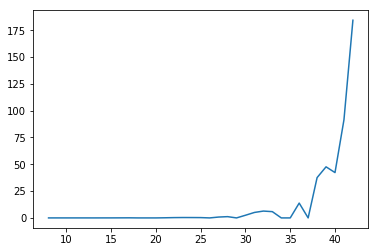

In [19]:
from matplotlib import pyplot as plt

plt.plot(orders, seconds)
plt.show()